<a href="https://colab.research.google.com/github/chacha255/21.11.4461/blob/master/uas_21_11_4461.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder

In [13]:
df = pd.read_csv('online_retail_II.csv')

print(df.info())

print(df.head())

<ipython-input-13-e3c63128a728>:1: DtypeWarning: Columns (1,2,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('online_retail_II.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      626 non-null    float64
 1   StockCode    626 non-null    object 
 2   Description  625 non-null    object 
 3   Quantity     626 non-null    float64
 4   InvoiceDate  626 non-null    object 
 5   Price        626 non-null    float64
 6   CustomerID   620 non-null    float64
 7   Country      626 non-null    object 
dtypes: float64(4), object(4)
memory usage: 64.0+ MB
None
    Invoice StockCode                          Description  Quantity  \
0  489434.0     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS      12.0   
1  489434.0    79323P                   PINK CHERRY LIGHTS      12.0   
2  489434.0    79323W                  WHITE CHERRY LIGHTS      12.0   
3  489434.0     22041         RECORD FRAME 7" SINGLE SIZE       48.0   
4  489434.0     21232       STRAWBERRY CERAMIC TRI

In [14]:
df.dropna(subset=['CustomerID'], inplace=True)

In [16]:
df['TotalPrice'] = df['Quantity'] * df['Price']

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [18]:
numerical_features = ['Quantity', 'Price', 'TotalPrice']

df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [19]:
print(df.head())

    Invoice StockCode                          Description  Quantity  \
0  489434.0     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS -0.003846   
1  489434.0    79323P                   PINK CHERRY LIGHTS -0.003846   
2  489434.0    79323W                  WHITE CHERRY LIGHTS -0.003846   
3  489434.0     22041         RECORD FRAME 7" SINGLE SIZE   0.837701   
4  489434.0     21232       STRAWBERRY CERAMIC TRINKET BOX  0.276670   

      InvoiceDate     Price  CustomerID         Country  TotalPrice  
0  12/1/2009 7:45  0.426390     13085.0  United Kingdom    0.991100  
1  12/1/2009 7:45  0.401120     13085.0  United Kingdom    0.950390  
2  12/1/2009 7:45  0.401120     13085.0  United Kingdom    0.950390  
3  12/1/2009 7:45 -0.186413     13085.0  United Kingdom    1.286245  
4  12/1/2009 7:45 -0.293811     13085.0  United Kingdom    0.085309  


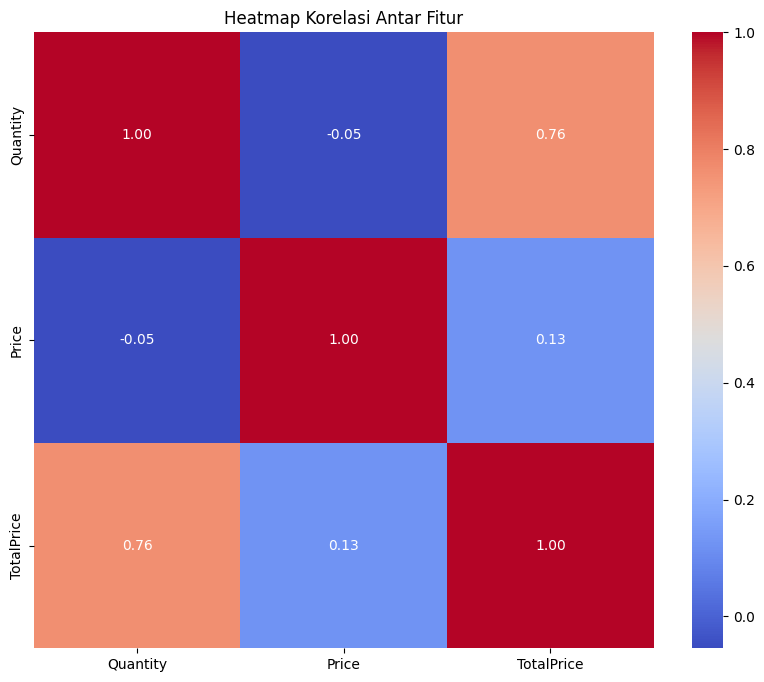

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

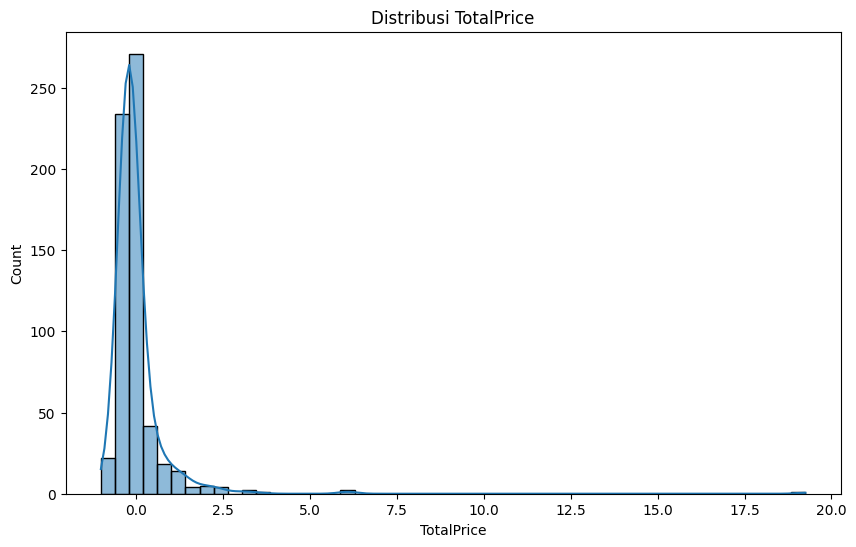

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPrice'], bins=50, kde=True)
plt.title('Distribusi TotalPrice')
plt.show()

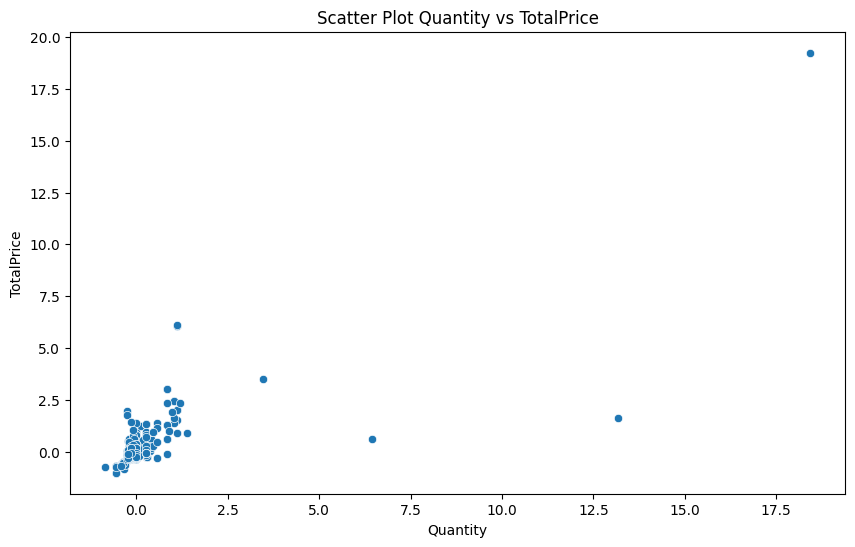

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='TotalPrice', data=df)
plt.title('Scatter Plot Quantity vs TotalPrice')
plt.show()

In [23]:
features = ['Quantity', 'Price', 'TotalPrice', 'Invoice']

X = df[features]
y = df['CustomerID']

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)

RandomForestClassifier()

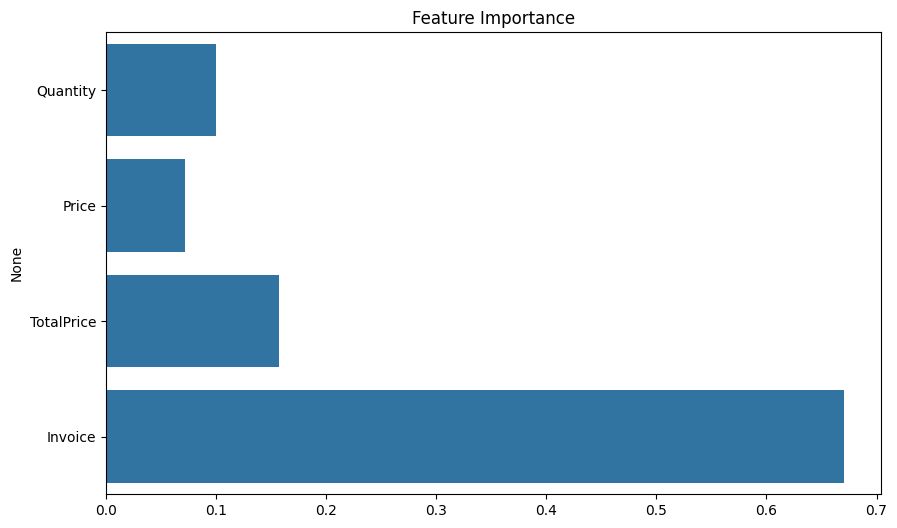

In [24]:
importance = rf.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=X.columns)
plt.title('Feature Importance')
plt.show()

In [25]:
X_clustering = df[['TotalPrice', 'Quantity', 'Invoice']]

In [26]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster'] = dbscan.fit_predict(X_clustering)

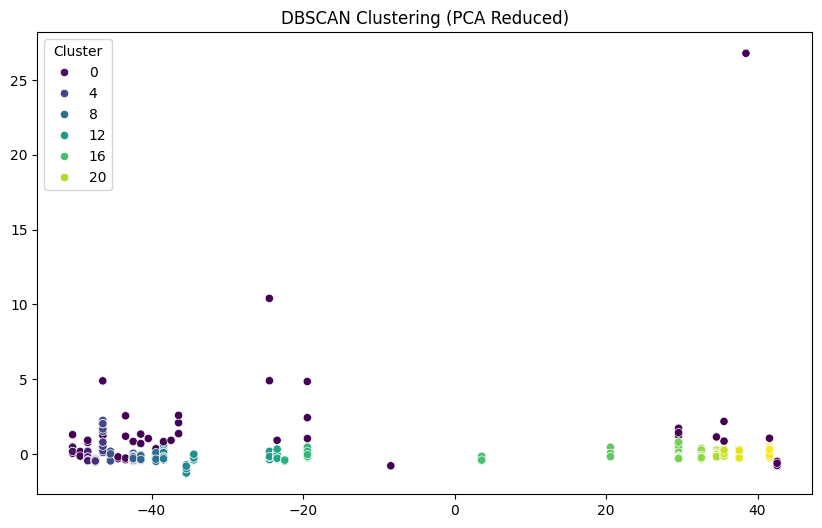

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clustering)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('DBSCAN Clustering (PCA Reduced)')
plt.show()

In [29]:
silhouette = silhouette_score(X_clustering, df['Cluster'])
print(f'Silhouette Score: {silhouette}')

Silhouette Score: 0.700530525742125
